<a href="https://colab.research.google.com/github/rajivsam/cmi_count_data_modeling/blob/main/model_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("car")
install.packages('gratia')
install.packages("tscount")
install.packages("mgcViz")
install.packages('caTools')
install.packages("AER")
install.packages("surveillance", repos = "http://cran.rstudio.com/")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’, ‘matrixStats’, ‘caret’, ‘RcppArmadillo’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘lme4’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘BH’, ‘patchwork’, ‘mvnfast’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘ltsa’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sass’, ‘doParallel’, ‘reshape’, ‘httpuv’, ‘xtable’, ‘fontawesome’, ‘sou

In [ ]:
require(nlme)
require(mgcv)
library("car")
library('gratia')
library("ggplot2")
library(tscount)
library(mgcViz)
library(dplyr)
library(surveillance)

Loading required package: nlme

Loading required package: mgcv

This is mgcv 1.8-38. For overview type 'help("mgcv-package")'.

Loading required package: carData

Loading required package: qgam

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Registered S3 methods overwritten by 'mgcViz':
  method       from  
  +.gg         GGally
  simulate.gam gratia


Attaching package: ‘mgcViz’


The following objects are masked from ‘package:stats’:

    qqline, qqnorm, qqplot



Attaching package: ‘dplyr’


The following object is masked from ‘package:car’:

    recode


The following object is masked from ‘package:nlme’:

    collapse


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: sp

Loading required package: xtable

This is surveillance 1.19.1. For overview type ‘help(surveillance)’.


Attaching package: ‘surve

In [ ]:
library(caTools)

In [ ]:
library("AER")

Loading required package: lmtest

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich

Loading required package: survival



# Month 1

In [ ]:
f1="https://raw.githubusercontent.com/rajivsam/cmi_count_data_modeling/data_branch/data/M1_transform_hourly_arrivals_dataset.csv"
data.m1=read.csv(f1)

In [ ]:
data.m1

h,arr.h.25.,arr.h.14.,arr.h.13.,arr.h.11.,arr.h.7.,arr.h.6.,arr.h.5.,arr.h.4.,arr.h.3.,arr.h.1.,Day,Week,arr.h.
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>
17:00:00,0,0,0,0,6,7,12,8,1,3,Wednesday,1,1
18:00:00,0,0,0,0,7,12,8,1,5,1,Wednesday,1,0
19:00:00,0,0,0,0,12,8,1,5,3,0,Wednesday,1,0
06:00:00,0,0,0,3,8,1,5,3,1,0,Thursday,1,0
07:00:00,6,0,0,6,1,5,3,1,0,0,Thursday,1,0
08:00:00,5,0,3,7,5,3,1,0,0,0,Thursday,1,1
09:00:00,5,3,6,12,3,1,0,0,0,1,Thursday,1,3
10:00:00,7,6,7,8,1,0,0,0,0,3,Thursday,1,4
11:00:00,6,7,12,1,0,0,0,0,1,4,Thursday,1,5


In [ ]:
str(data.m1)

'data.frame':	311 obs. of  14 variables:
 $ h        : chr  "17:00:00" "18:00:00" "19:00:00" "06:00:00" ...
 $ arr.h.25.: num  0 0 0 0 6 5 5 7 6 5 ...
 $ arr.h.14.: num  0 0 0 0 0 0 3 6 7 12 ...
 $ arr.h.13.: num  0 0 0 0 0 3 6 7 12 8 ...
 $ arr.h.11.: num  0 0 0 3 6 7 12 8 1 5 ...
 $ arr.h.7. : num  6 7 12 8 1 5 3 1 0 0 ...
 $ arr.h.6. : num  7 12 8 1 5 3 1 0 0 0 ...
 $ arr.h.5. : num  12 8 1 5 3 1 0 0 0 0 ...
 $ arr.h.4. : num  8 1 5 3 1 0 0 0 0 1 ...
 $ arr.h.3. : num  1 5 3 1 0 0 0 0 1 3 ...
 $ arr.h.1. : num  3 1 0 0 0 0 1 3 4 5 ...
 $ Day      : chr  "Wednesday" "Wednesday" "Wednesday" "Thursday" ...
 $ Week     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ arr.h.   : num  1 0 0 0 0 1 3 4 5 7 ...


In [ ]:
data.m1$Day = recode(data.m1$Day, 
       "Sunday"="1",
       "Monday"="2",
       "Tuesday"="3",
       "Wednesday"="4",
       "Thursday"="5",
       "Friday"="6")

In [ ]:
data.m1$h=strptime(data.m1$h,format = "%H:%M:%S")

In [ ]:
data.m1=transform(data.m1,h=as.numeric(data.m1$h),Day=as.numeric(data.m1$Day),Week=as.numeric(data.m1$Week))

In [ ]:
str(data.m1)

'data.frame':	311 obs. of  14 variables:
 $ h        : num  1.64e+09 1.64e+09 1.64e+09 1.64e+09 1.64e+09 ...
 $ arr.h.25.: num  0 0 0 0 6 5 5 7 6 5 ...
 $ arr.h.14.: num  0 0 0 0 0 0 3 6 7 12 ...
 $ arr.h.13.: num  0 0 0 0 0 3 6 7 12 8 ...
 $ arr.h.11.: num  0 0 0 3 6 7 12 8 1 5 ...
 $ arr.h.7. : num  6 7 12 8 1 5 3 1 0 0 ...
 $ arr.h.6. : num  7 12 8 1 5 3 1 0 0 0 ...
 $ arr.h.5. : num  12 8 1 5 3 1 0 0 0 0 ...
 $ arr.h.4. : num  8 1 5 3 1 0 0 0 0 1 ...
 $ arr.h.3. : num  1 5 3 1 0 0 0 0 1 3 ...
 $ arr.h.1. : num  3 1 0 0 0 0 1 3 4 5 ...
 $ Day      : num  4 4 4 5 5 5 5 5 5 5 ...
 $ Week     : num  1 1 1 1 1 1 1 1 1 1 ...
 $ arr.h.   : num  1 0 0 0 0 1 3 4 5 7 ...


In [ ]:
length(unique(data.m1$Week))

[1] 5

In [ ]:
set.seed(123)
sample = sample.split(data.m1,SplitRatio = 0.7 )
df.m1=subset(data.m1,sample ==TRUE)
df.m1.test=subset(data.m1,sample ==FALSE)

In [ ]:
length(unique(df.m1$h))

[1] 9

In [ ]:
m0.poisson.ar.m1 = gam(arr.h. ~ s(arr.h.25.) + s(arr.h.14.) + s(arr.h.13.) + s(arr.h.11.) + s(arr.h.7.) + s(arr.h.6.) + s(arr.h.5.) + s(arr.h.4.) + s(arr.h.3.) + s(arr.h.1.) + 
                              s(Day,k=6) + s(Week,k=5) + s(h,k=9),
                              family = poisson, data = df.m1, method = "ML")

In [ ]:
m0.nb.ar.m1 = gam(arr.h. ~ s(arr.h.25.) + s(arr.h.14.) + s(arr.h.13.) + s(arr.h.11.) + s(arr.h.7.) + s(arr.h.6.) + s(arr.h.5.) + s(arr.h.4.) + s(arr.h.3.) + s(arr.h.1.) + 
                              s(Day,k=6) + s(Week,k=5) + s(h,k=9),
                        family = nb, data = df.m1, method = "ML")

In [ ]:
AIC (m0.poisson.ar.m1, m0.nb.ar.m1)

,df,AIC
,<dbl>,<dbl>
m0.poisson.ar.m1,22.94315,718.9620
m0.nb.ar.m1,23.82972,721.2035


In [ ]:
options(repr.plot.width = 8, repr.plot.height = 8)

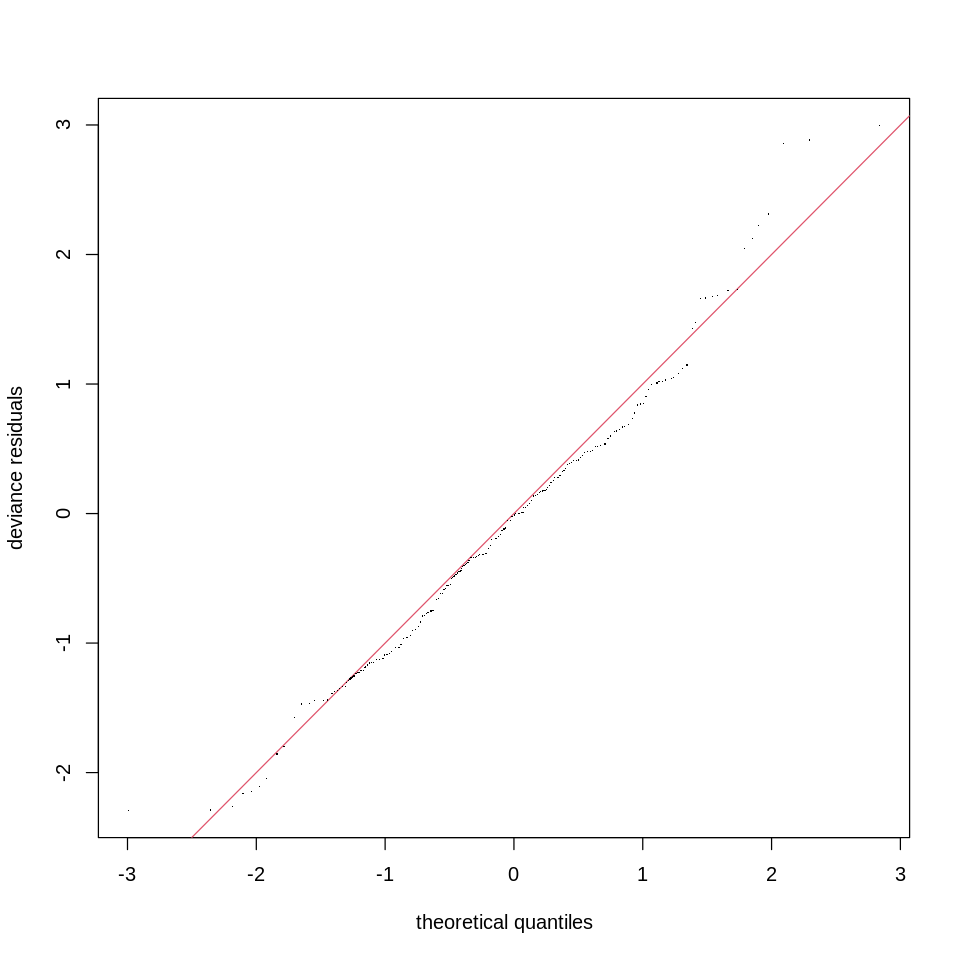

In [ ]:
qq.gam(m0.poisson.ar.m1)

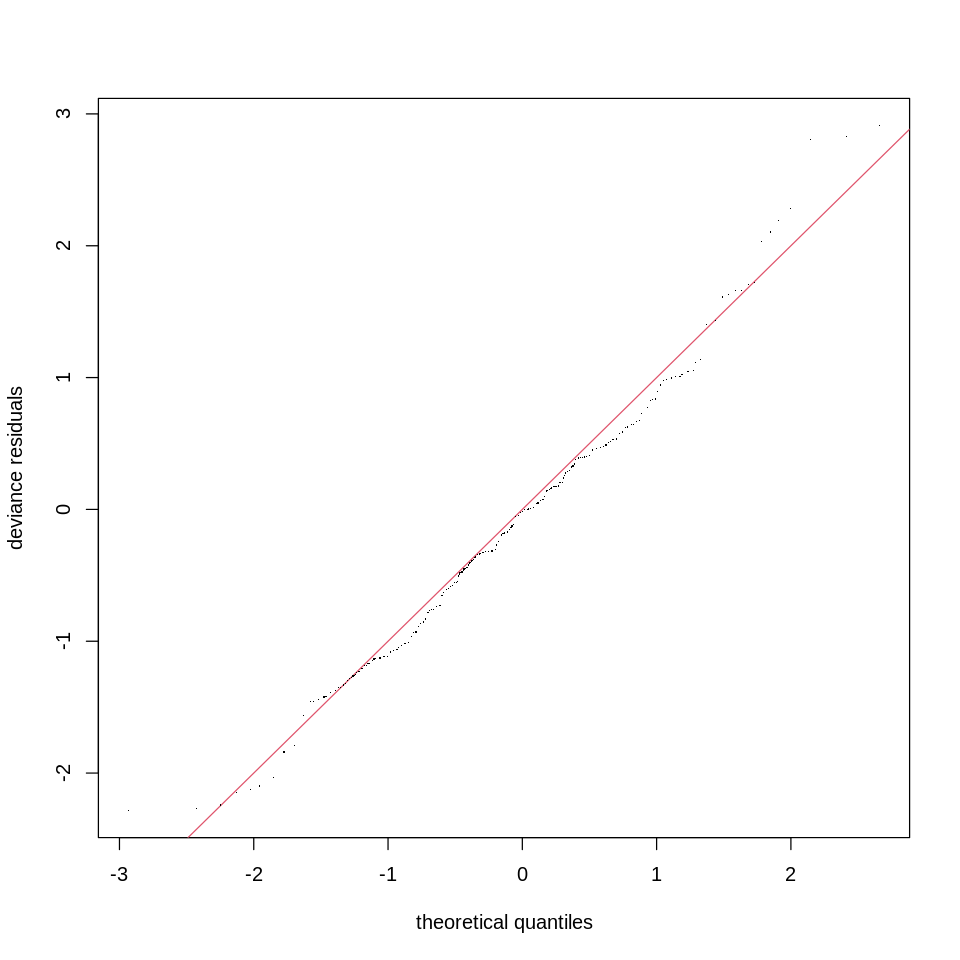

In [ ]:
qq.gam(m0.nb.ar.m1)

In [ ]:
summary(m0.poisson.ar.m1)


Family: poisson 
Link function: log 

Formula:
arr.h. ~ s(arr.h.25.) + s(arr.h.14.) + s(arr.h.13.) + s(arr.h.11.) + 
    s(arr.h.7.) + s(arr.h.6.) + s(arr.h.5.) + s(arr.h.4.) + s(arr.h.3.) + 
    s(arr.h.1.) + s(Day, k = 6) + s(Week, k = 5) + s(h, k = 9)

Parametric coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.62719    0.08287   7.568 3.78e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
               edf Ref.df Chi.sq  p-value    
s(arr.h.25.) 1.000  1.000  3.818   0.0507 .  
s(arr.h.14.) 1.000  1.000  0.097   0.7560    
s(arr.h.13.) 1.000  1.000  0.415   0.5195    
s(arr.h.11.) 1.000  1.000  0.282   0.5956    
s(arr.h.7.)  1.000  1.000  4.746   0.0294 *  
s(arr.h.6.)  1.000  1.000  3.952   0.0468 *  
s(arr.h.5.)  1.000  1.000  0.211   0.6457    
s(arr.h.4.)  1.000  1.000  1.250   0.2635    
s(arr.h.3.)  1.000  1.000  2.315   0.1282    
s(arr.h.1.)  1.000  1.000  0.003   0.9574 

In [ ]:
t1 = gam(arr.h. ~ s(arr.h.25.) + s(arr.h.14.) + s(arr.h.13.) + s(arr.h.11.) + s(arr.h.7.) + s(arr.h.6.) + s(arr.h.5.) + s(arr.h.4.) + s(arr.h.3.) + s(arr.h.1.) + 
                  s(Day,k=6) + s(Week,k=5),
                  family = poisson, data = df.m1, method = "ML")

t0 = gam(arr.h.~1,family = poisson, data = df.m1, method = "ML")


## Explained variance by significant smooth terms

In [ ]:
cat("The variance explained by 's(h)' is","\n",(deviance(t1)-deviance(m0.poisson.ar.m1))/deviance(t0))

The variance explained by 's(h)' is 
 0.03880634

### The statistically significant smooth term is s(h).

## Vizualization of smooth terms

In [ ]:
sg.poisson.ar.m1 = gam(arr.h. ~ s(h,k=9),family = poisson, data = df.m1, method = "ML")

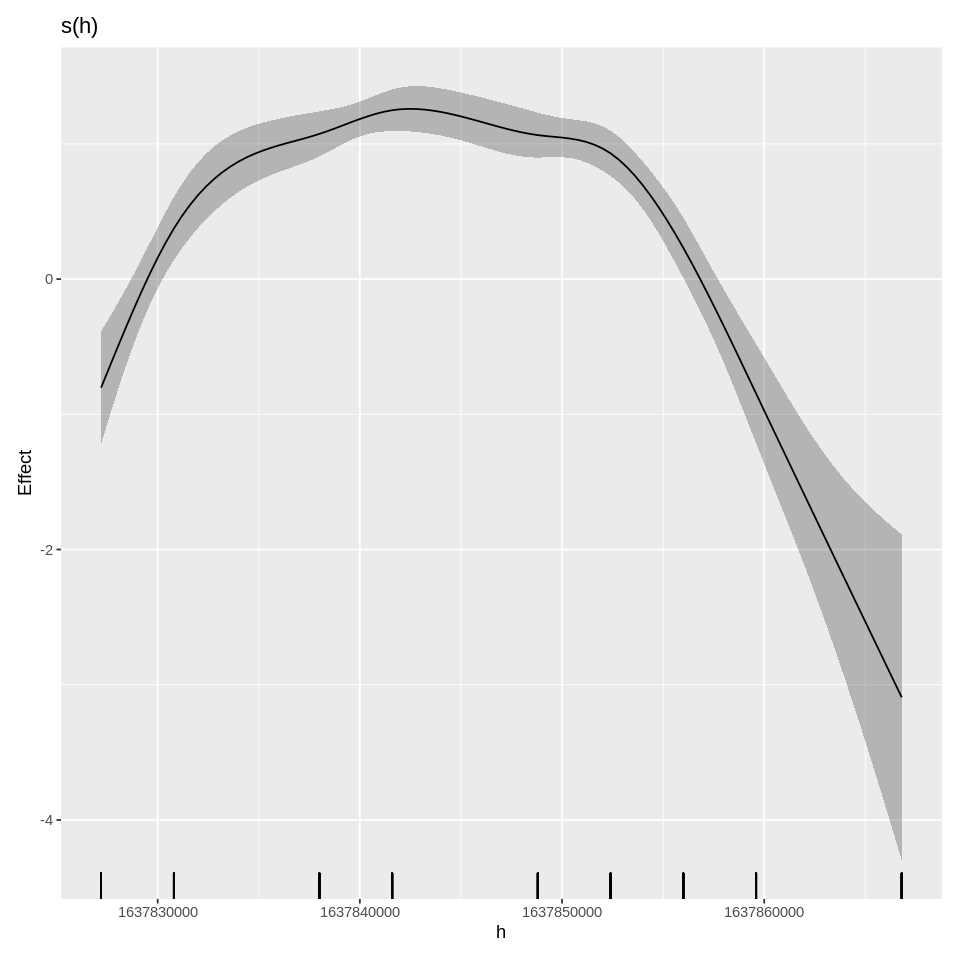

In [ ]:
draw(sg.poisson.ar.m1)

## Prediction vs Actual

In [ ]:
pred.arr.h1=exp(predict.gam(sg.poisson.ar.m1,df.m1.test))

In [ ]:
mean(pred.arr.h1)

[1] 2.264599

In [ ]:
act.arr.h1=df.m1.test$arr.h.

In [ ]:
mean(act.arr.h1)

[1] 2.126126

In [ ]:
mu=mean(pred.arr.h1)
weighted.mean(scores(act.arr.h1, mu=mu, size = NULL, which = "ses", sign =  TRUE))

[1] 4.132264

In [ ]:
scoring(act.arr.h1, pred.arr.h1, distr="poisson", individual=FALSE)[3]

spherical 
-0.703728

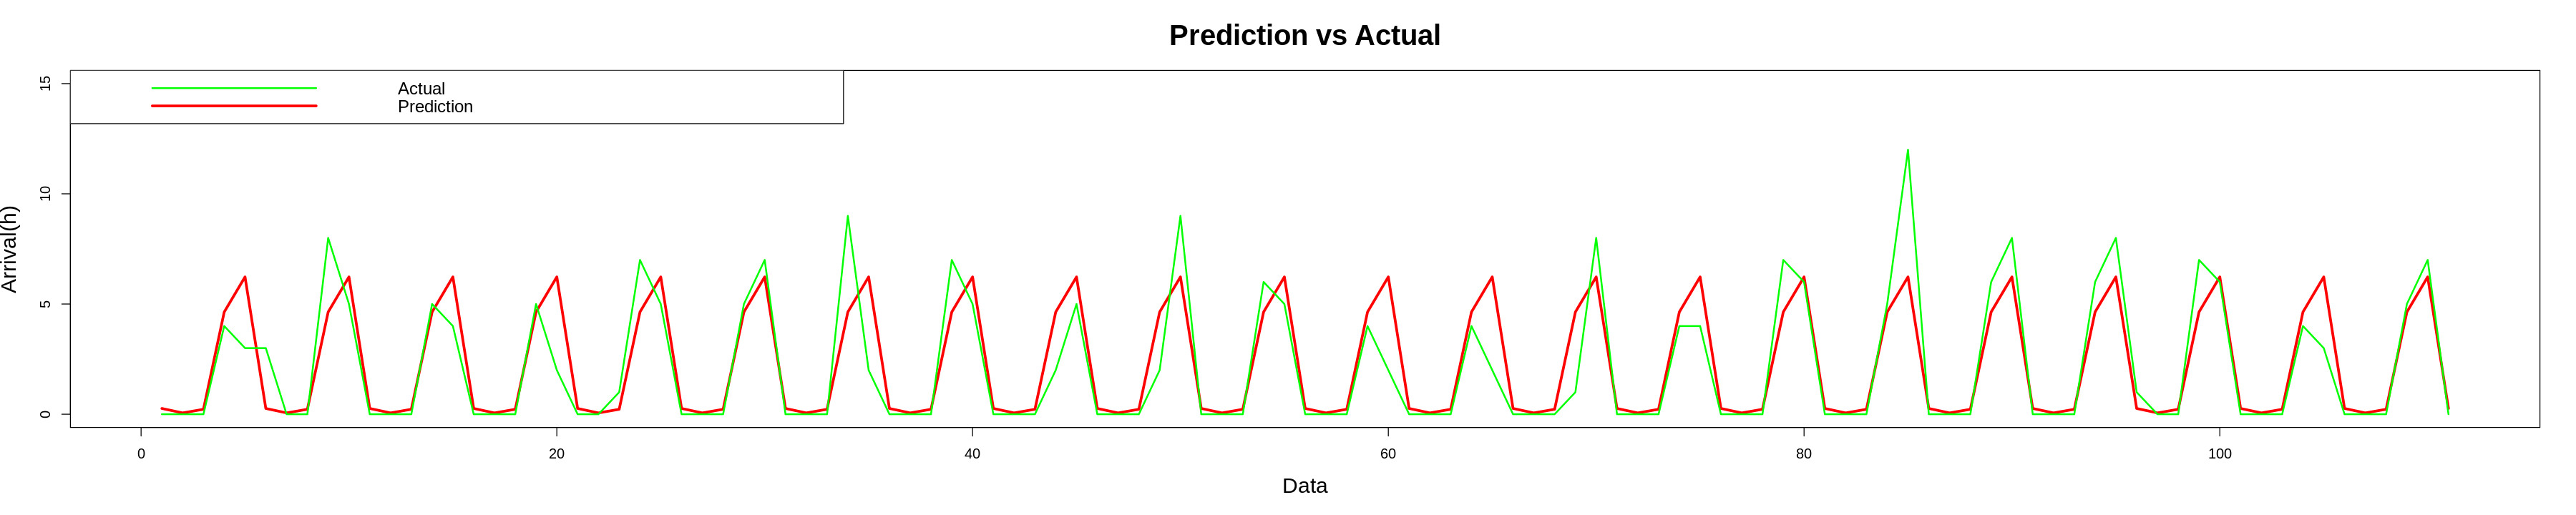

In [ ]:
options(repr.plot.width = 30, repr.plot.height = 6)
plot(pred.arr.h1,type="l",col="red",ylab="Arrival(h)",xlab="Data",ylim=c(0,15),lwd=3,main = "Prediction vs Actual",cex.lab=1.5,cex.main=2)
lines(act.arr.h1,col="green",lwd=2)
legend("topleft",legend=c("Actual","Prediction"), col=c("green","red"),lty=c(1,1),lwd=c(2,3),bty="o",cex = 1.2)

# Month 2

In [ ]:
f2="https://raw.githubusercontent.com/rajivsam/cmi_count_data_modeling/data_branch/data/M2_transform_hourly_arrivals_dataset.csv"
data.m2=read.csv(f2)

In [ ]:
data.m2

h,arr.h.18.,arr.h.14.,arr.h.13.,arr.h.12.,arr.h.10.,arr.h.7.,arr.h.6.,arr.h.5.,arr.h.4.,arr.h.3.,arr.h.1.,Day,Week,arr.h.
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>
10:00:00,0,8,10,7,7,0,0,0,0,2,4,Wednesday,5,7
11:00:00,0,10,7,12,5,0,0,0,2,0,7,Wednesday,5,5
12:00:00,2,7,12,7,3,0,0,2,0,4,5,Wednesday,5,10
13:00:00,3,12,7,5,0,0,2,0,4,7,10,Wednesday,5,7
14:00:00,8,7,5,3,0,2,0,4,7,5,7,Wednesday,5,9
15:00:00,10,5,3,0,0,0,4,7,5,10,9,Wednesday,5,7
16:00:00,7,3,0,0,0,4,7,5,10,7,7,Wednesday,5,2
17:00:00,12,0,0,0,2,7,5,10,7,9,2,Wednesday,5,3
18:00:00,7,0,0,0,0,5,10,7,9,7,3,Wednesday,5,0


In [ ]:
data.m2$Day = recode(data.m2$Day, 
       "Sunday"="1",
       "Monday"="2",
       "Tuesday"="3",
       "Wednesday"="4",
       "Thursday"="5",
       "Friday"="6")

In [ ]:
data.m2$h=strptime(data.m2$h,format = "%H:%M:%S")

In [ ]:
data.m2=transform(data.m2,h=as.numeric(data.m2$h),Day=as.numeric(data.m2$Day),Week=as.numeric(data.m2$Week))

In [ ]:
length(unique(data.m2$Week))

[1] 5

In [ ]:
set.seed(123)
sample = sample.split(data.m2,SplitRatio = 0.7 )
df.m2=subset(data.m2,sample ==TRUE)
df.m2.test=subset(data.m2,sample ==FALSE)

In [ ]:
length(unique(df.m2$h))

[1] 14

In [ ]:
m0.poisson.ar.m2 = gam(arr.h. ~ s(arr.h.18.) + s(arr.h.14.) + s(arr.h.13.) + s(arr.h.12.) + s(arr.h.10.) +
                              s(arr.h.7.) + s(arr.h.6.) + s(arr.h.5.) + s(arr.h.4.) + s(arr.h.3.) + s(arr.h.1.) + 
                              s(Day,k=6) + s(Week,k=5) + s(h),
                              family = poisson, data = df.m2, method = "ML")

In [ ]:
m0.nb.ar.m2 = gam(arr.h. ~ s(arr.h.18.) + s(arr.h.14.) + s(arr.h.13.) + s(arr.h.12.) + s(arr.h.10.) +
                           s(arr.h.7.) + s(arr.h.6.) + s(arr.h.5.) + s(arr.h.4.) + s(arr.h.3.) + s(arr.h.1.) + 
                           s(Day,k=6) + s(Week,k=5) + s(h),
                           family = nb, data = df.m2, method = "ML")

In [ ]:
AIC (m0.poisson.ar.m2, m0.nb.ar.m2)

,df,AIC
,<dbl>,<dbl>
m0.poisson.ar.m2,26.55236,659.5852
m0.nb.ar.m2,27.55205,661.5851


In [ ]:
options(repr.plot.width = 8, repr.plot.height = 8)

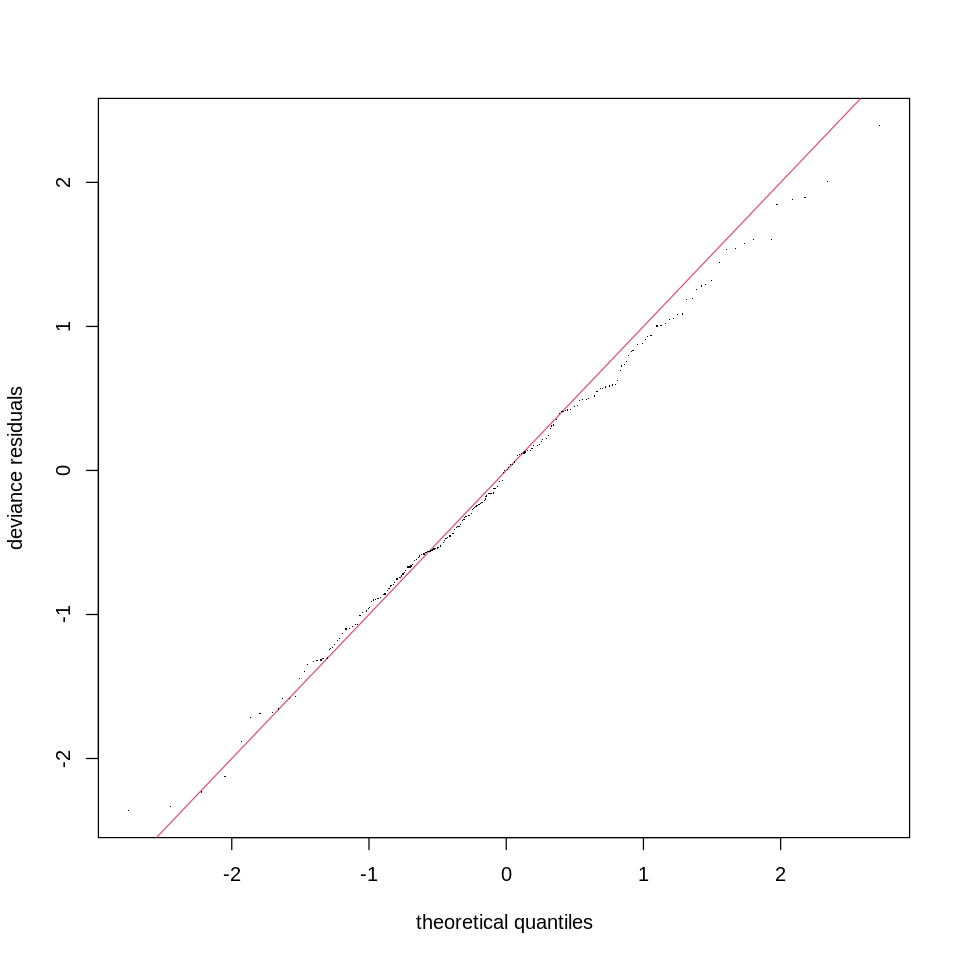

In [ ]:
qq.gam(m0.poisson.ar.m2)

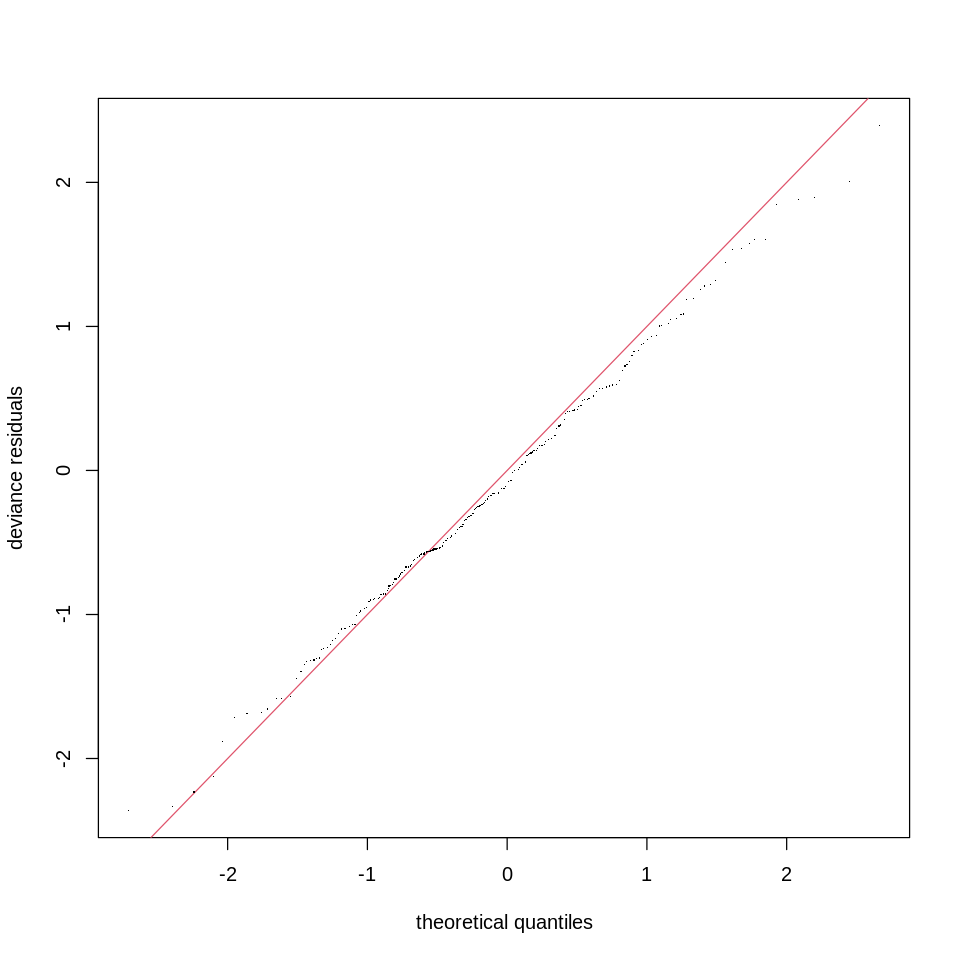

In [ ]:
qq.gam(m0.nb.ar.m2)

In [ ]:
summary(m0.poisson.ar.m2)


Family: poisson 
Link function: log 

Formula:
arr.h. ~ s(arr.h.18.) + s(arr.h.14.) + s(arr.h.13.) + s(arr.h.12.) + 
    s(arr.h.10.) + s(arr.h.7.) + s(arr.h.6.) + s(arr.h.5.) + 
    s(arr.h.4.) + s(arr.h.3.) + s(arr.h.1.) + s(Day, k = 6) + 
    s(Week, k = 5) + s(h)

Parametric coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)   0.2429     0.1048   2.317   0.0205 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
               edf Ref.df Chi.sq  p-value    
s(arr.h.18.) 2.230  2.753  6.932 0.043346 *  
s(arr.h.14.) 1.000  1.000  0.100 0.752213    
s(arr.h.13.) 1.000  1.000  1.039 0.308089    
s(arr.h.12.) 1.656  2.076  2.792 0.261164    
s(arr.h.10.) 1.000  1.000  0.023 0.879813    
s(arr.h.7.)  1.000  1.000  0.026 0.871835    
s(arr.h.6.)  1.000  1.000  0.059 0.808661    
s(arr.h.5.)  1.000  1.000  3.614 0.057307 .  
s(arr.h.4.)  1.000  1.000  0.159 0.690159    
s(arr.h.3.)  1.000  1.000  2.251 

In [ ]:
t1 = gam(arr.h. ~ s(arr.h.18.) + s(arr.h.14.) + s(arr.h.13.) + s(arr.h.12.) + s(arr.h.10.) +
                  s(arr.h.7.) + s(arr.h.6.) + s(arr.h.5.) + s(arr.h.4.) + s(arr.h.3.) + s(arr.h.1.) + 
                  s(Week,k=5) + s(h),
                  family = poisson, data = df.m2, method = "ML")
t2 = gam(arr.h. ~ s(arr.h.18.) + s(arr.h.14.) + s(arr.h.13.) + s(arr.h.12.) + s(arr.h.10.) +
                  s(arr.h.7.) + s(arr.h.6.) + s(arr.h.5.) + s(arr.h.4.) + s(arr.h.3.) + s(arr.h.1.) + 
                  s(Day,k=6) + s(Week,k=5),
                  family = poisson, data = df.m2, method = "ML")

t0 = gam(arr.h.~1,family = poisson, data = df.m2, method = "ML")


## Explained variance by significant smooth terms

In [ ]:
cat("The variance explained by 's(Day)' is","\n",(deviance(t1)-deviance(m0.poisson.ar.m2))/deviance(t0))

In [ ]:
cat("The variance explained by 's(h)' is","\n",(deviance(t2)-deviance(m0.poisson.ar.m2))/deviance(t0))

The variance explained by 's(h)' is 
 0.04349317

### The statistically significant smooth terms are s(Day) and s(h).

## Vizualization of smooth terms

In [ ]:
sg.poisson.ar.m2 = gam(arr.h. ~ s(Day,k=6) + s(h),family = poisson, data = df.m2, method = "ML")

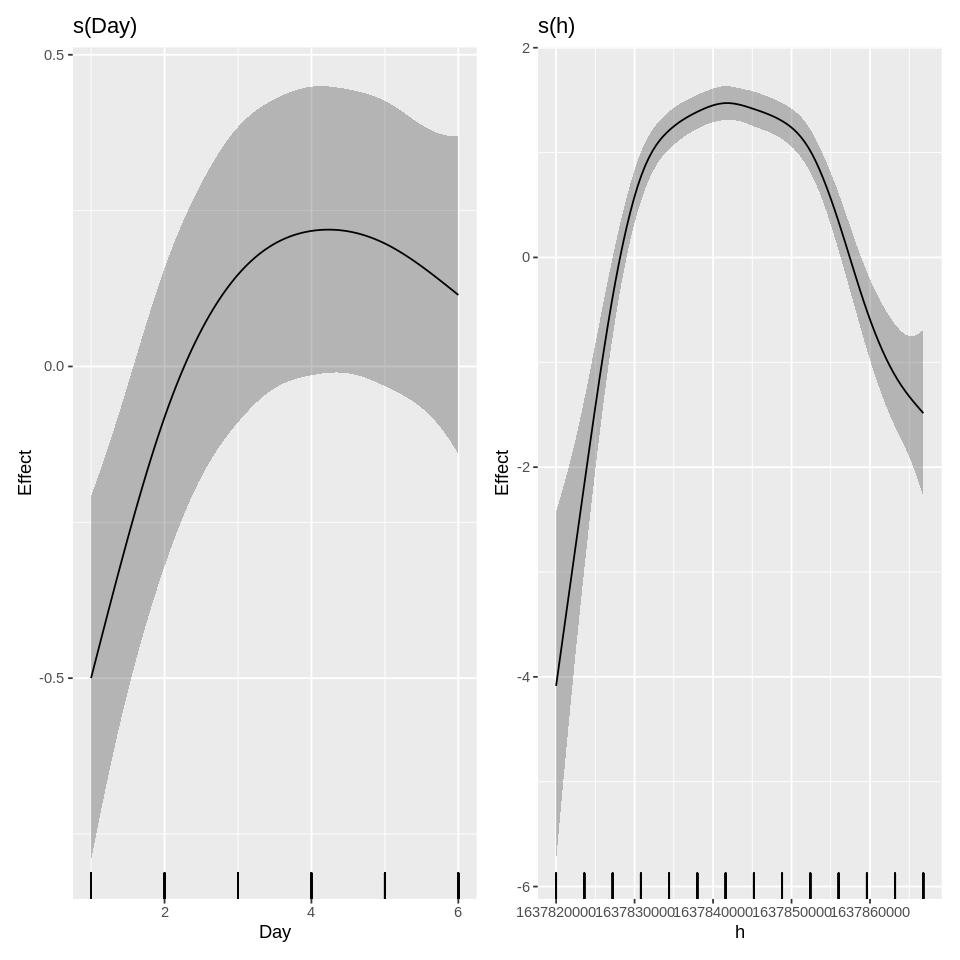

In [ ]:
draw(sg.poisson.ar.m2)

## Prediction vs Actual

In [ ]:
pred.arr.h2=exp(predict.gam(sg.poisson.ar.m2,df.m2.test))

In [ ]:
mean(pred.arr.h2)

[1] 2.572708

In [ ]:
act.arr.h2=df.m2.test$arr.h.

In [ ]:
mean(act.arr.h2)

[1] 2.896226

In [ ]:
mu=mean(pred.arr.h2)
weighted.mean(scores(act.arr.h2, mu=mu, size = NULL, which = "ses", sign =  TRUE))

[1] 4.570533

In [ ]:
scoring(act.arr.h2, pred.arr.h2, distr="poisson", individual=FALSE)[3]

spherical 
-0.5658469

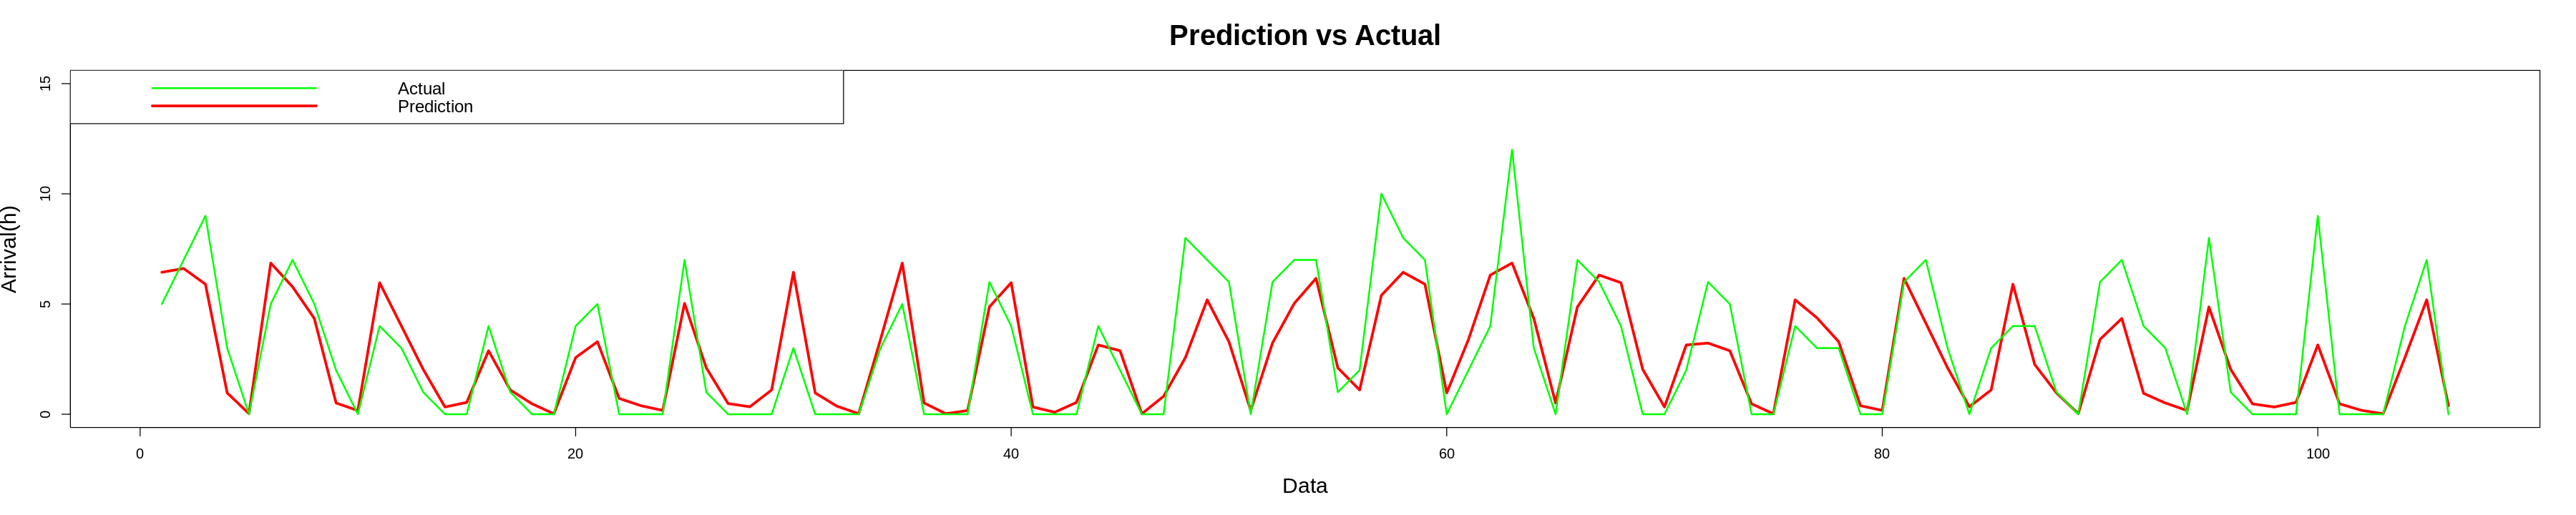

In [ ]:
options(repr.plot.width = 30, repr.plot.height = 6)
plot(pred.arr.h2,type="l",col="red",ylab="Arrival(h)",xlab="Data",ylim=c(0,15),lwd=3,main = "Prediction vs Actual",cex.lab=1.5,cex.main=2)
lines(act.arr.h2,col="green",lwd=2)
legend("topleft",legend=c("Actual","Prediction"), col=c("green","red"),lty=c(1,1),lwd=c(2,3),bty="o",cex = 1.2)

# Month 3

In [ ]:
f3="https://raw.githubusercontent.com/rajivsam/cmi_count_data_modeling/data_branch/data/M3_transform_hourly_arrivals_dataset.csv"
data.m3=read.csv(f3)

In [ ]:
data.m3

h,arr.h.26.,arr.h.19.,arr.h.12.,arr.h.11.,arr.h.10.,arr.h.7.,arr.h.6.,arr.h.5.,arr.h.4.,arr.h.3.,arr.h.2.,arr.h.1.,Day,Week,arr.h.
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>
18:00:00,0,6,0,0,2,4,6,4,8,2,4,2,Wednesday,9,0
19:00:00,0,8,0,2,6,6,4,8,2,4,2,0,Wednesday,9,0
06:00:00,4,6,2,6,2,4,8,2,4,2,0,0,Thursday,9,0
07:00:00,5,2,6,2,4,8,2,4,2,0,0,0,Thursday,9,0
08:00:00,6,2,2,4,6,2,4,2,0,0,0,0,Thursday,9,3
09:00:00,6,0,4,6,4,4,2,0,0,0,0,3,Thursday,9,4
10:00:00,9,0,6,4,8,2,0,0,0,0,3,4,Thursday,9,5
11:00:00,6,0,4,8,2,0,0,0,0,3,4,5,Thursday,9,3
12:00:00,8,0,8,2,4,0,0,0,3,4,5,3,Thursday,9,9


In [ ]:
data.m3$Day = recode(data.m3$Day, 
       "Sunday"="1",
       "Monday"="2",
       "Tuesday"="3",
       "Wednesday"="4",
       "Thursday"="5",
       "Friday"="6")

In [ ]:
data.m3$h=strptime(data.m3$h,format = "%H:%M:%S")

In [ ]:
data.m3=transform(data.m3,h=as.numeric(data.m3$h),Day=as.numeric(data.m3$Day),Week=as.numeric(data.m3$Week))

In [ ]:
length(unique(data.m3$Week))

[1] 5

In [ ]:
set.seed(123)
sample = sample.split(data.m3,SplitRatio = 0.7 )
df.m3=subset(data.m3,sample ==TRUE)
df.m3.test=subset(data.m3,sample ==FALSE)

In [ ]:
length(unique(df.m3$h))

[1] 14

In [ ]:
m0.poisson.ar.m3 = gam(arr.h. ~ s(arr.h.26.) + s(arr.h.19.) + s(arr.h.12.) + s(arr.h.11.) + s(arr.h.10.) +
                              s(arr.h.7.) + s(arr.h.6.) + s(arr.h.5.) + s(arr.h.4.) + s(arr.h.3.) + s(arr.h.2.) + s(arr.h.1.) + 
                              s(Day,k=6) + s(Week,k=5) + s(h),
                              family = poisson, data = df.m3, method = "ML")

In [ ]:
m0.nb.ar.m3 = gam(arr.h. ~ s(arr.h.26.) + s(arr.h.19.) + s(arr.h.12.) + s(arr.h.11.) + s(arr.h.10.) +
                        s(arr.h.7.) + s(arr.h.6.) + s(arr.h.5.) + s(arr.h.4.) + s(arr.h.3.) + s(arr.h.2.) + s(arr.h.1.) + 
                        s(Day,k=6) + s(Week,k=5) + s(h),
                        family = nb, data = df.m3, method = "ML")

In [ ]:
AIC (m0.poisson.ar.m3, m0.nb.ar.m3)

,df,AIC
,<dbl>,<dbl>
m0.poisson.ar.m3,26.08864,777.6589
m0.nb.ar.m3,27.08762,779.6597


In [ ]:
options(repr.plot.width = 8, repr.plot.height = 8)

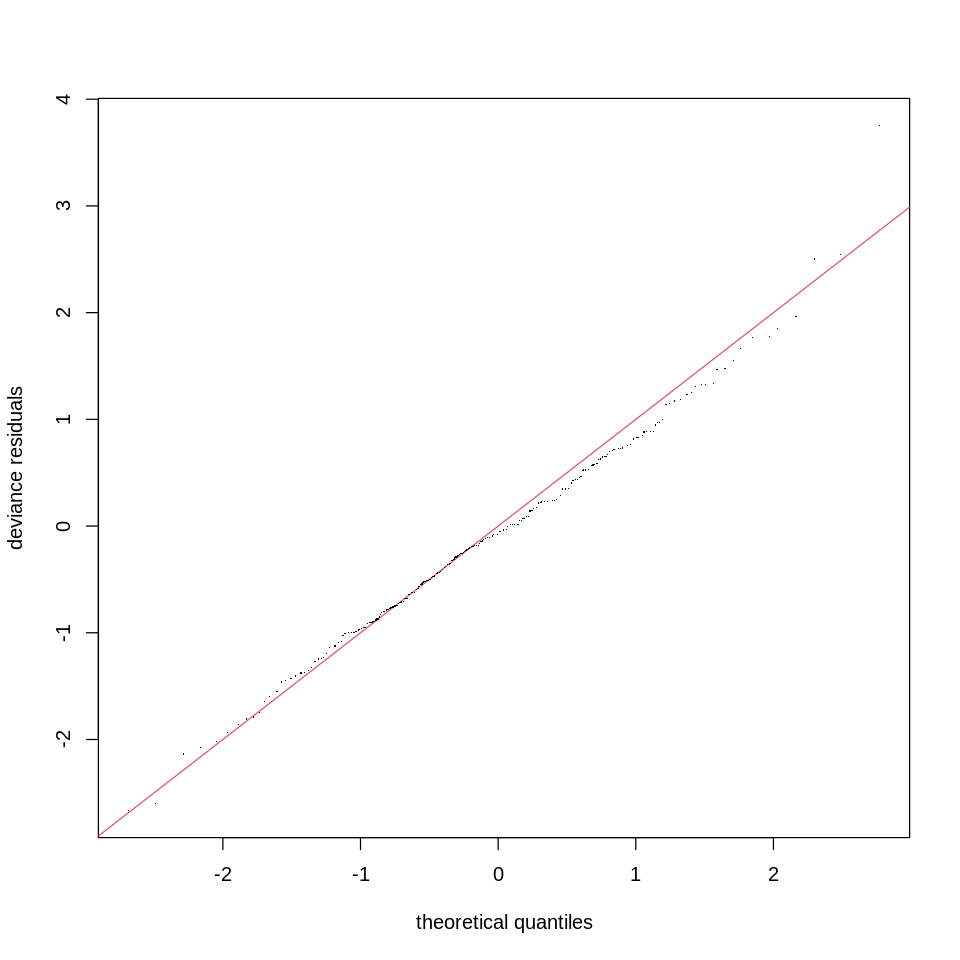

In [ ]:
qq.gam(m0.poisson.ar.m3)

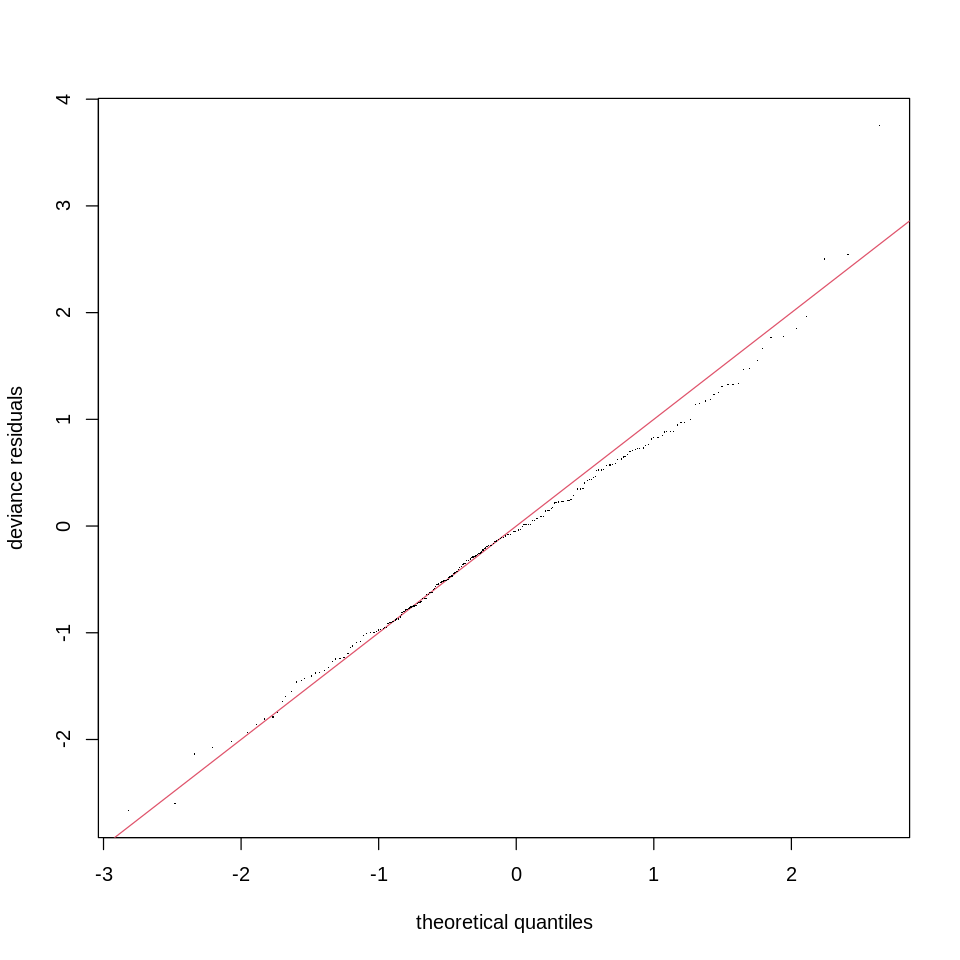

In [ ]:
qq.gam(m0.nb.ar.m3)

In [ ]:
summary(m0.poisson.ar.m3)


Family: poisson 
Link function: log 

Formula:
arr.h. ~ s(arr.h.26.) + s(arr.h.19.) + s(arr.h.12.) + s(arr.h.11.) + 
    s(arr.h.10.) + s(arr.h.7.) + s(arr.h.6.) + s(arr.h.5.) + 
    s(arr.h.4.) + s(arr.h.3.) + s(arr.h.2.) + s(arr.h.1.) + s(Day, 
    k = 6) + s(Week, k = 5) + s(h)

Parametric coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.34551    0.09449   3.657 0.000255 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
               edf Ref.df Chi.sq  p-value    
s(arr.h.26.) 1.585  1.976  4.740 0.114800    
s(arr.h.19.) 1.001  1.001  0.404 0.524836    
s(arr.h.12.) 1.000  1.000  0.306 0.580000    
s(arr.h.11.) 1.000  1.000  0.520 0.470658    
s(arr.h.10.) 1.633  2.038  1.892 0.374018    
s(arr.h.7.)  1.000  1.000  0.029 0.865248    
s(arr.h.6.)  1.000  1.000  0.274 0.600574    
s(arr.h.5.)  1.000  1.000  0.865 0.352365    
s(arr.h.4.)  1.000  1.000  2.486 0.114892    
s(arr.h.3.)  1.

In [ ]:
t1 = gam(arr.h. ~ s(arr.h.26.) + s(arr.h.19.) + s(arr.h.12.) + s(arr.h.11.) + s(arr.h.10.) +
                  s(arr.h.7.) + s(arr.h.6.) + s(arr.h.5.) + s(arr.h.4.) + s(arr.h.3.) + s(arr.h.2.) + s(arr.h.1.) + 
                  s(Week,k=5) + s(h),
                  family = poisson, data = df.m3, method = "ML")
t2 = gam(arr.h. ~ s(arr.h.26.) + s(arr.h.19.) + s(arr.h.12.) + s(arr.h.11.) + s(arr.h.10.) +
                  s(arr.h.7.) + s(arr.h.6.) + s(arr.h.5.) + s(arr.h.4.) + s(arr.h.3.) + s(arr.h.2.) + s(arr.h.1.) + 
                  s(Day,k=6) + s(Week,k=5),
                  family = poisson, data = df.m3, method = "ML")

t0 = gam(arr.h.~1,family = poisson, data = df.m3, method = "ML")


## Explained variance by significant smooth terms

In [ ]:
cat("The variance explained by 's(Day)' is","\n",(deviance(t1)-deviance(m0.poisson.ar.m3))/deviance(t0))

In [ ]:
cat("The variance explained by 's(h)' is","\n",(deviance(t2)-deviance(m0.poisson.ar.m3))/deviance(t0))

The variance explained by 's(h)' is 
 0.06498101

### The statistically significant smooth terms are s(Day) and s(h).

## Vizualization of smooth terms

In [ ]:
sg.poisson.ar.m3 = gam(arr.h. ~ s(Day,k=6) + s(h),family = poisson, data = df.m3, method = "ML")

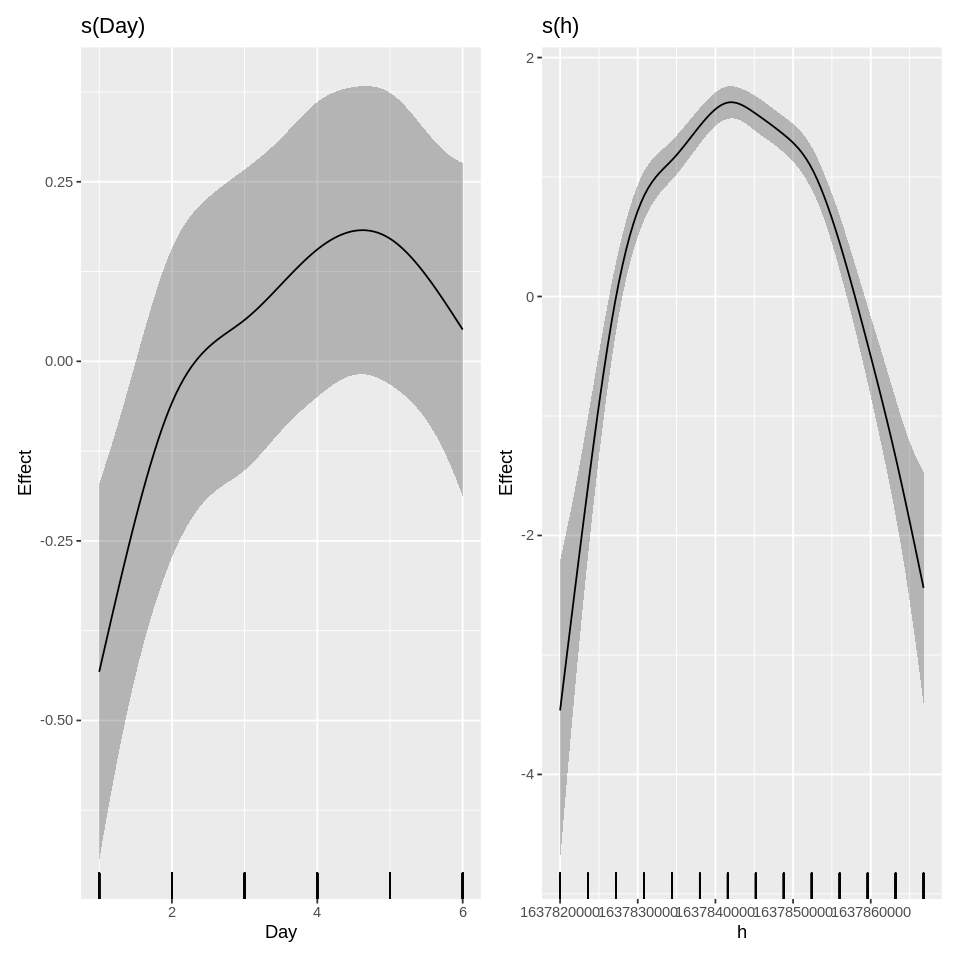

In [ ]:
draw(sg.poisson.ar.m3)

## Prediction vs Actual

In [ ]:
pred.arr.h3=exp(predict.gam(sg.poisson.ar.m3,df.m3.test))

In [ ]:
mean(pred.arr.h3)

[1] 3.161816

In [ ]:
act.arr.h3=df.m3.test$arr.h.

In [ ]:
mean(act.arr.h3)

[1] 3.509091

In [ ]:
mu=mean(pred.arr.h3)
weighted.mean(scores(act.arr.h3, mu=mu, size = NULL, which = "ses", sign =  TRUE))

[1] 5.412531

In [ ]:
scoring(act.arr.h3, pred.arr.h3, distr="poisson", individual=FALSE)[3]

spherical 
-0.4912107

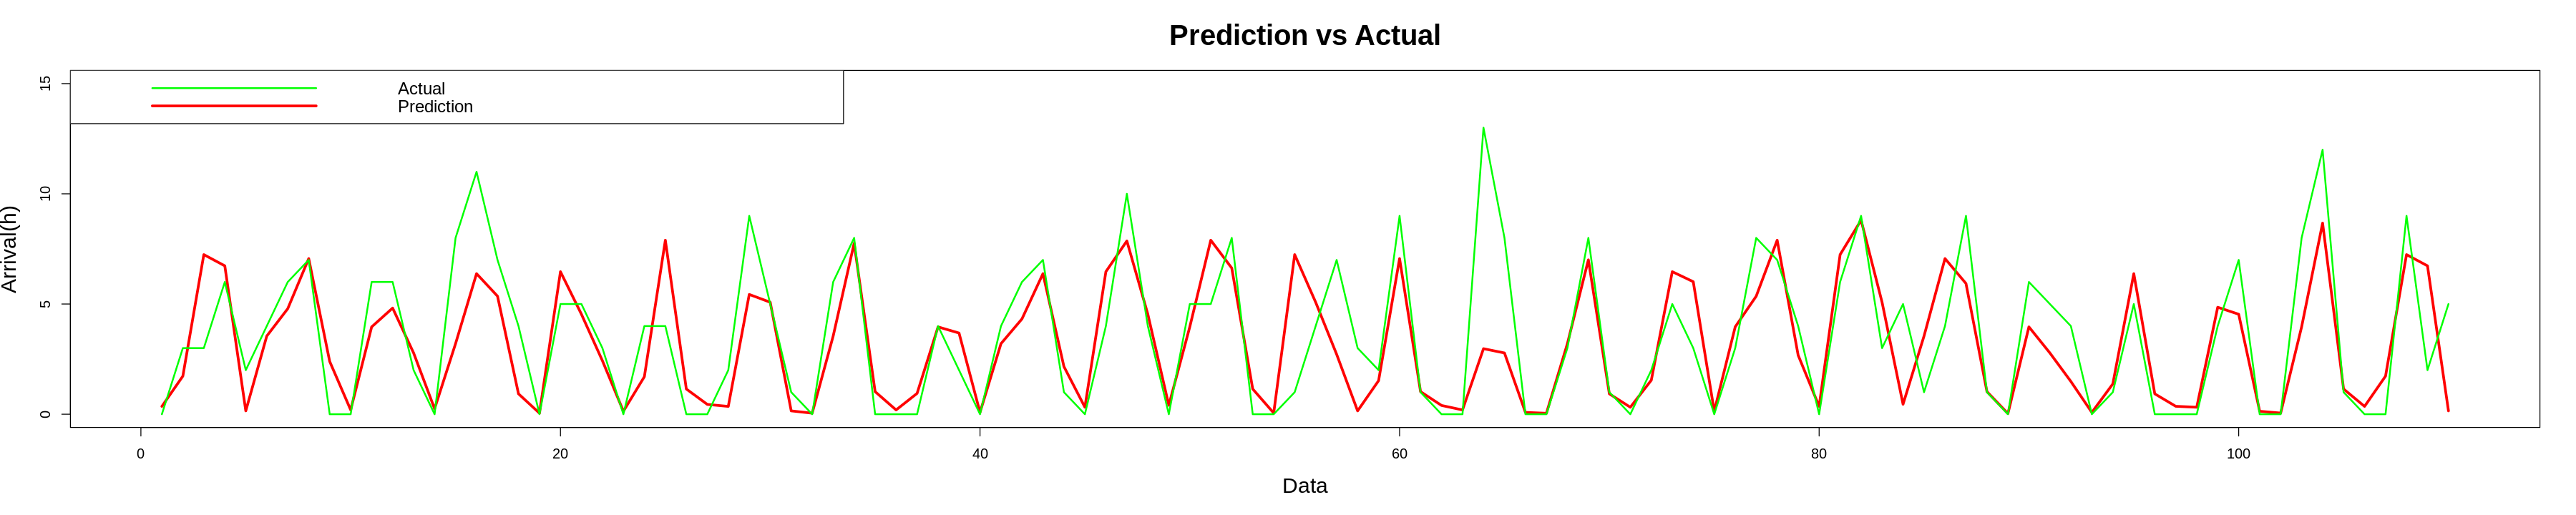

In [ ]:
options(repr.plot.width = 30, repr.plot.height = 6)
plot(pred.arr.h3,type="l",col="red",ylab="Arrival(h)",xlab="Data",ylim=c(0,15),lwd=3,main = "Prediction vs Actual",cex.lab=1.5,cex.main=2)
lines(act.arr.h3,col="green",lwd=2)
legend("topleft",legend=c("Actual","Prediction"), col=c("green","red"),lty=c(1,1),lwd=c(2,3),bty="o",cex = 1.2)

## Model Intuition

We can see the hourly arrivals are affected by different factors for different models. For month 1 the only factor significantly affecting the data is **hour** of that day, for month 2 and 3 the responsible factors are **Day** and **hour**. We may say that the GAM model is capturing different factors reponsible for the fluctuations in the hourly arrivals in different months.

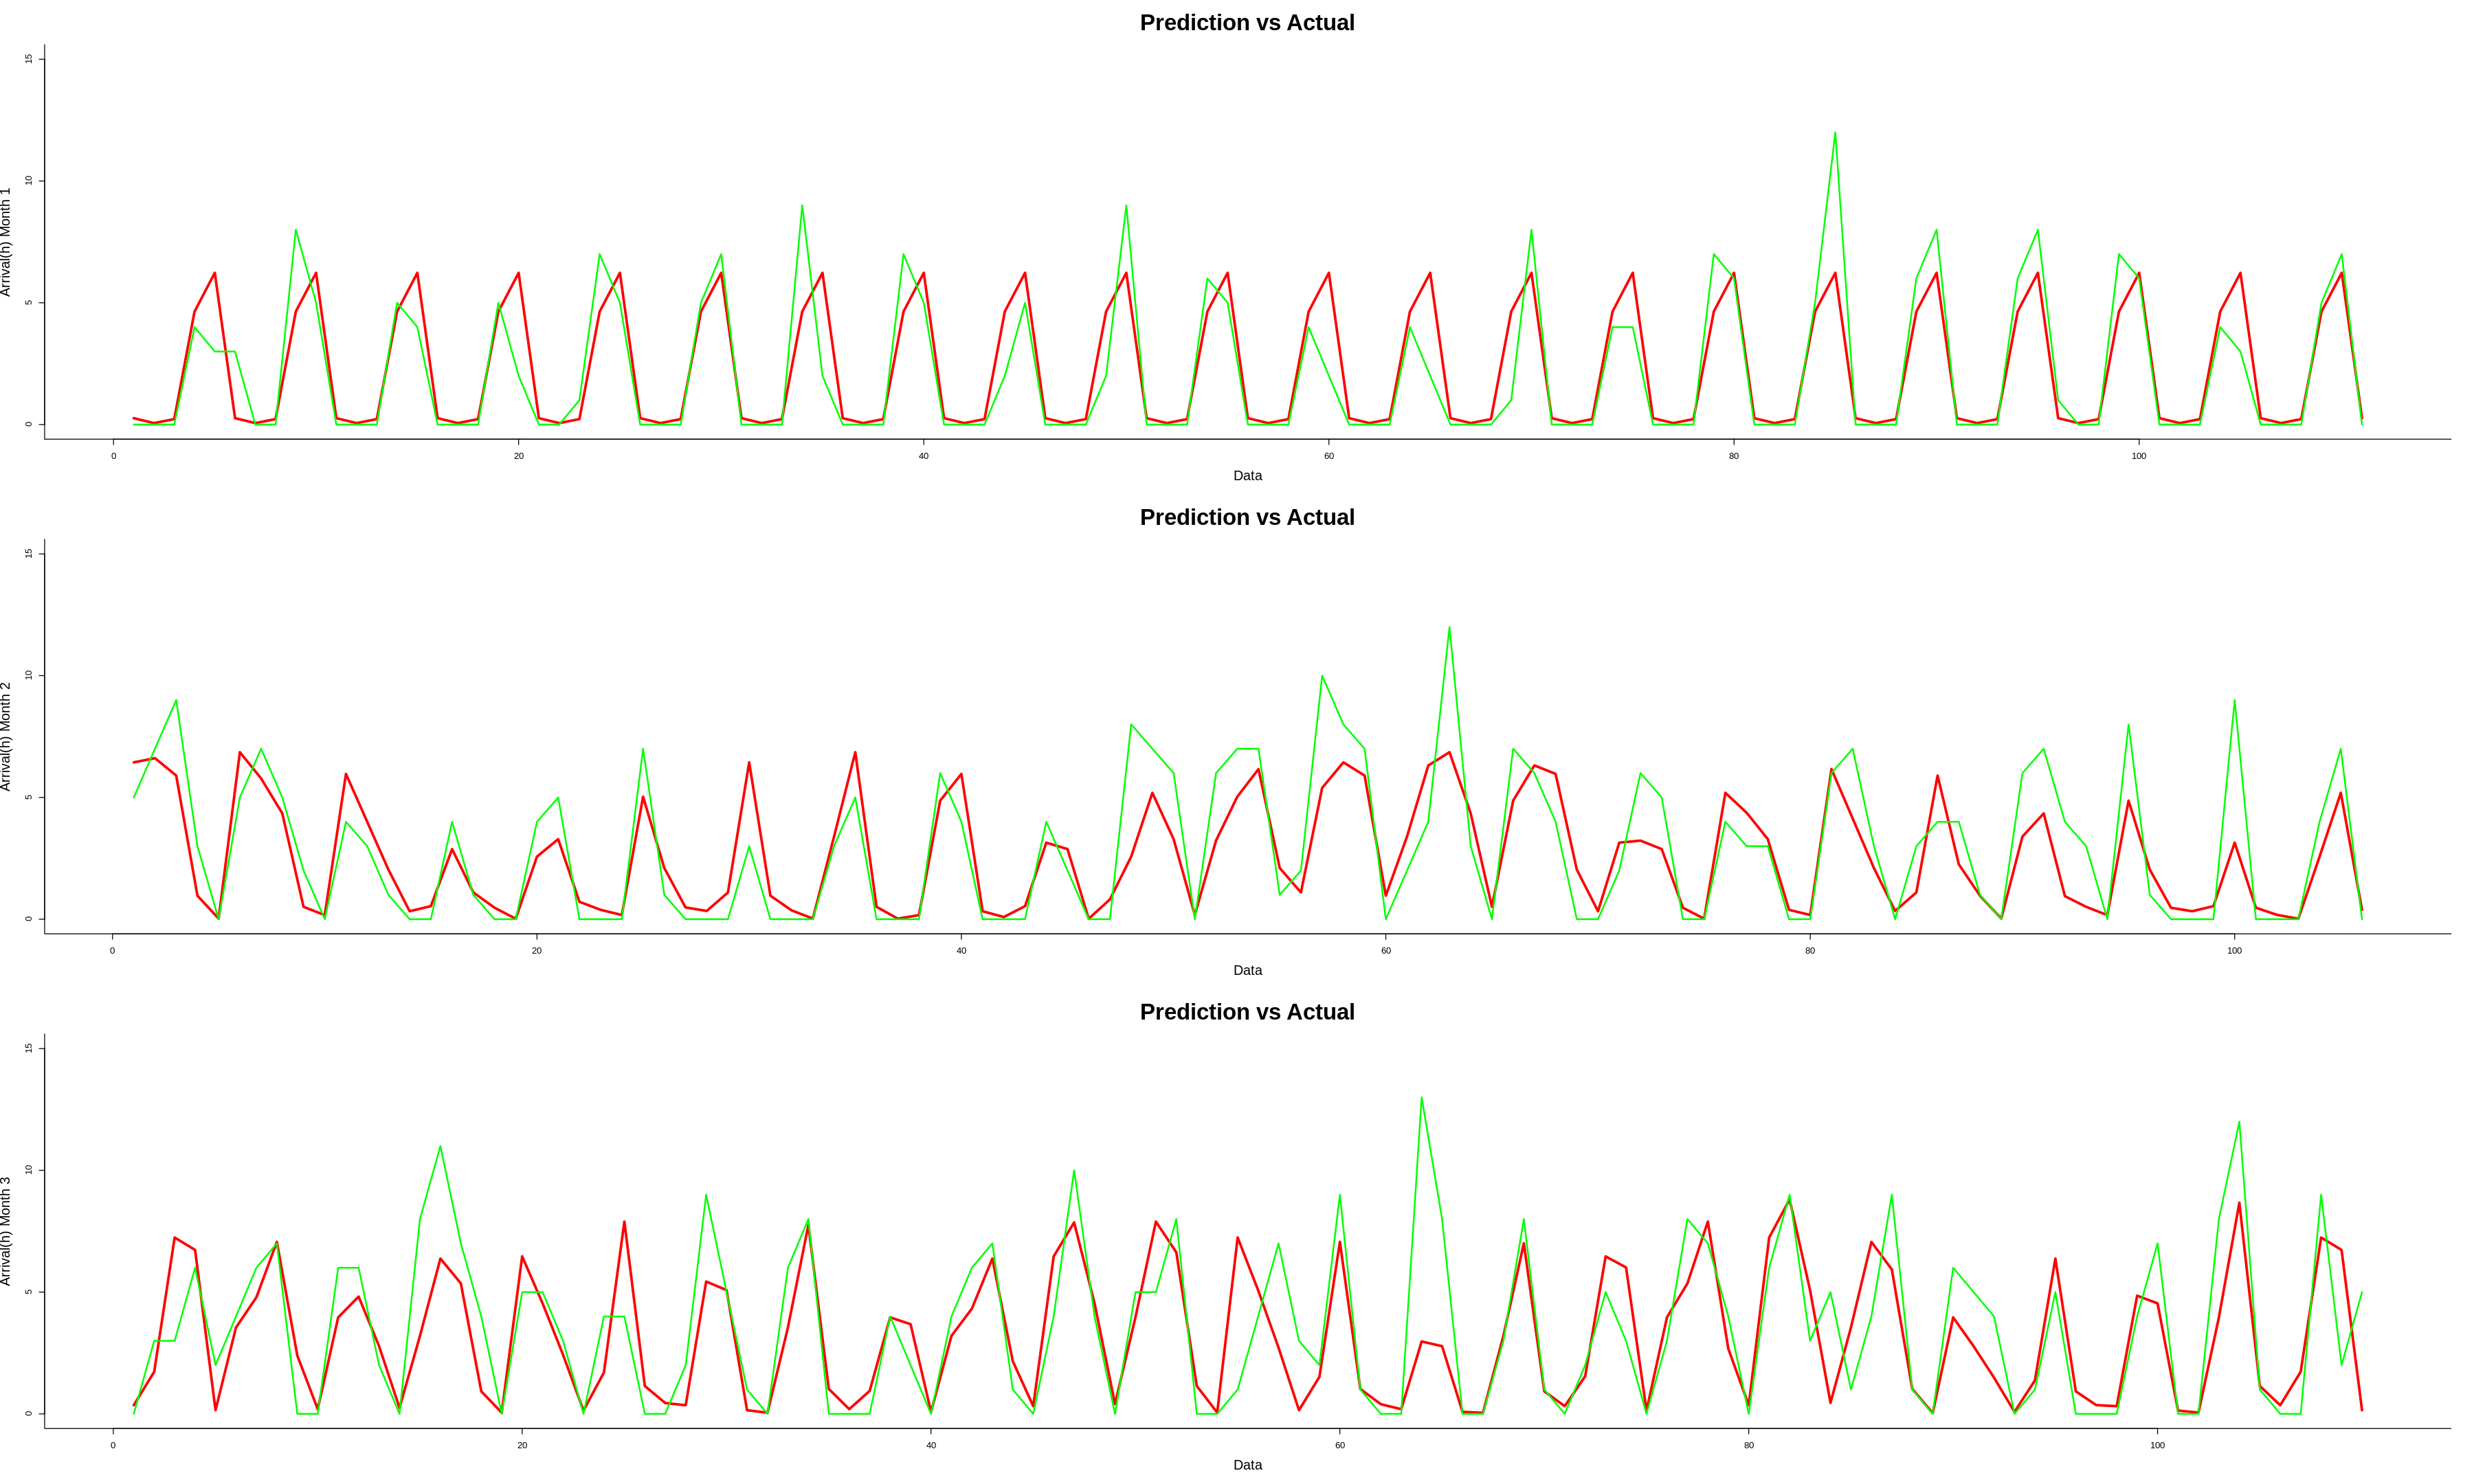

In [ ]:
par(mfrow=c(3,1),xpd=TRUE)
options(repr.plot.width = 30, repr.plot.height = 18)
plot(pred.arr.h1,type="l",col="red",ylab="Arrival(h) Month 1", xlab="Data",ylim=c(0,15),lwd=3,main = "Prediction vs Actual",cex.lab=1.5,cex.main=2.5,bty='L')
lines(act.arr.h1,col="green",lwd=2)

plot(pred.arr.h2,type="l",col="red",ylab="Arrival(h) Month 2",xlab="Data",ylim=c(0,15),lwd=3,main = "Prediction vs Actual",cex.lab=1.5,cex.main=2.5,bty='L')
lines(act.arr.h2,col="green",lwd=2)

plot(pred.arr.h3,type="l",col="red",ylab="Arrival(h) Month 3",xlab="Data",ylim=c(0,15),lwd=3,main = "Prediction vs Actual",cex.lab=1.5,cex.main=2.5,bty='L')
lines(act.arr.h3,col="green",lwd=2)

legend("topright",inset=c(-0.2,0),legend=c("Actual","Prediction"), col=c("green","red"),lty=c(1,1),lwd=c(2,3),bty="o",cex = 1.2,xpd = TRUE)

From the plots of "Prediction vs Actual" for three mmonths we observe that for month 1, the model is predicting constant hourly arrival rate for every 5 hours. 

Now we will randomly choose one day from each month and see how the models for each month perform.

### month 1

In [ ]:
df.m1.test$pred.arr.h=pred.arr.h1

set.seed(123)

w1=sample(df.m1.test$Week,1)
d1=sample(df.m1.test$Day,1)

df.sample1=df.m1.test[df.m1.test$Week==w1 & df.m1.test$Day==d1,]

In [ ]:
df.sample1

,h,arr.h.25.,arr.h.14.,arr.h.13.,arr.h.11.,arr.h.7.,arr.h.6.,arr.h.5.,arr.h.4.,arr.h.3.,arr.h.1.,Day,Week,arr.h.,pred.arr.h
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
46,1637820000,7,0,0,0,4,9,7,2,0,0,2,2,0,0.05954138
47,1637823600,8,0,0,5,9,7,2,0,0,0,2,2,0,0.22416878
50,1637834400,5,5,12,4,0,0,0,0,0,5,2,2,5,4.63805210
53,1637845200,2,4,9,2,0,0,0,5,5,4,2,2,2,6.23050752
58,1637863200,0,0,0,0,5,4,2,4,5,1,2,2,0,0.26176321


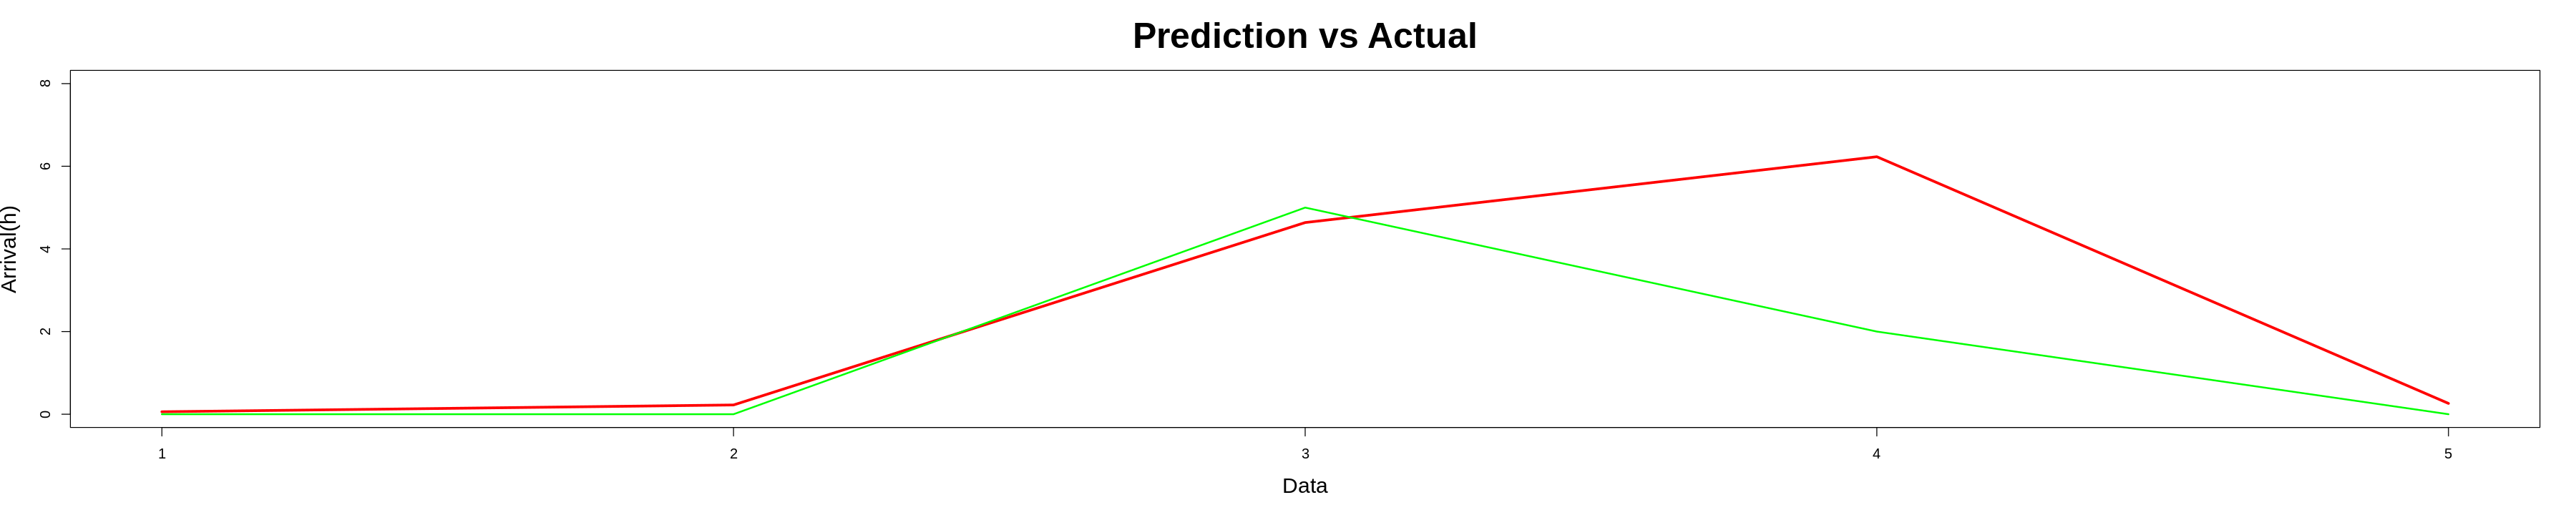

In [ ]:
options(repr.plot.width = 30, repr.plot.height = 6)
plot(df.sample1$pred.arr.h,type="l",col="red",ylab="Arrival(h)", xlab="Data",ylim=c(0,8),lwd=3,main = "Prediction vs Actual",cex.lab=1.5,cex.main=2.5)
lines(df.sample1$arr.h.,col="green",lwd=2)

### month 2

In [ ]:
df.m2.test$pred.arr.h=pred.arr.h2

set.seed(123)

w2=sample(df.m2.test$Week,1)
d2=sample(df.m2.test$Day,1)

df.sample2=df.m2.test[df.m2.test$Week==w2 & df.m2.test$Day==d2,]

In [ ]:
df.sample2

,h,arr.h.18.,arr.h.14.,arr.h.13.,arr.h.12.,arr.h.10.,arr.h.7.,arr.h.6.,arr.h.5.,arr.h.4.,arr.h.3.,arr.h.1.,Day,Week,arr.h.,pred.arr.h
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
53,1637820000,1,0,0,0,0,1,4,1,1,0,0,2,6,0,0.0200076
56,1637830800,0,0,0,2,1,1,0,0,0,0,0,2,6,4,2.5698445
62,1637852400,2,1,1,0,0,0,4,3,5,5,5,2,6,5,3.2873596
64,1637859600,1,0,0,0,0,3,5,5,7,5,1,2,6,0,0.7162999
65,1637863200,4,0,0,0,0,5,5,7,5,5,0,2,6,0,0.3857094


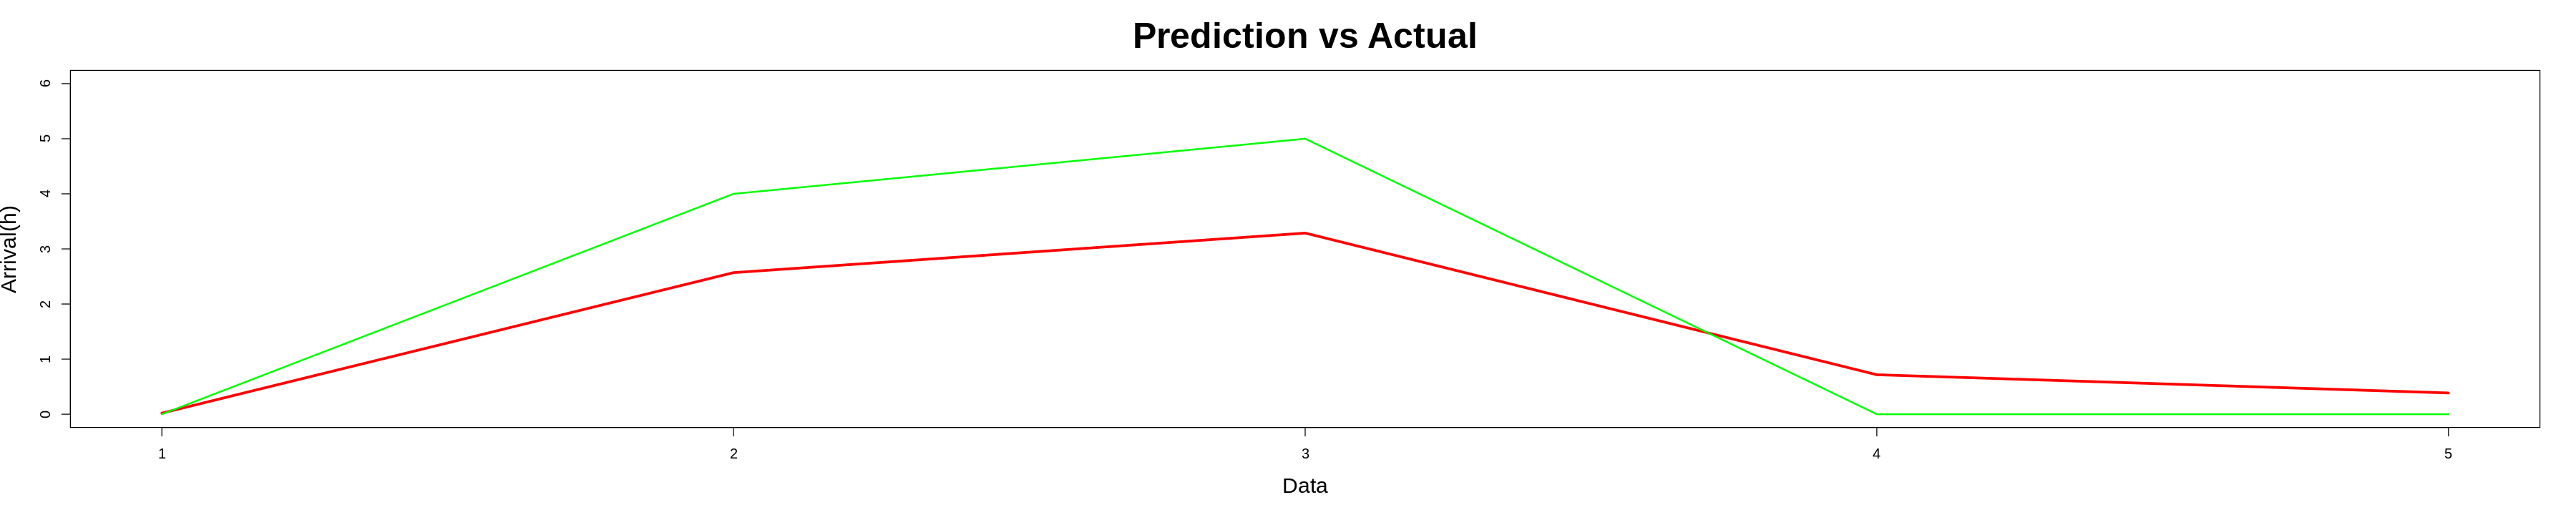

In [ ]:
options(repr.plot.width = 30, repr.plot.height = 6)
plot(df.sample2$pred.arr.h,type="l",col="red",ylab="Arrival(h)", xlab="Data",ylim=c(0,6),lwd=3,main = "Prediction vs Actual",cex.lab=1.5,cex.main=2.5)
lines(df.sample2$arr.h.,col="green",lwd=2)

### month 3

In [ ]:
df.m3.test$pred.arr.h=pred.arr.h3

set.seed(123)

w3=sample(df.m3.test$Week,1)
d3=sample(df.m3.test$Day,1)

df.sample3=df.m3.test[df.m3.test$Week==w3 & df.m3.test$Day==d3,]

In [ ]:
df.sample3

,h,arr.h.26.,arr.h.19.,arr.h.12.,arr.h.11.,arr.h.10.,arr.h.7.,arr.h.6.,arr.h.5.,arr.h.4.,arr.h.3.,arr.h.2.,arr.h.1.,Day,Week,arr.h.,pred.arr.h
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
75,1637827200,3,4,4,5,9,5,3,1,0,0,0,0,4,10,4,1.7026884
80,1637845200,2,2,5,3,1,0,0,4,4,4,10,11,4,10,4,7.8954673
84,1637859600,0,9,0,0,0,4,10,11,4,6,4,0,4,10,0,1.1450972
85,1637863200,0,5,0,0,4,10,11,4,6,4,0,0,4,10,0,0.4454792


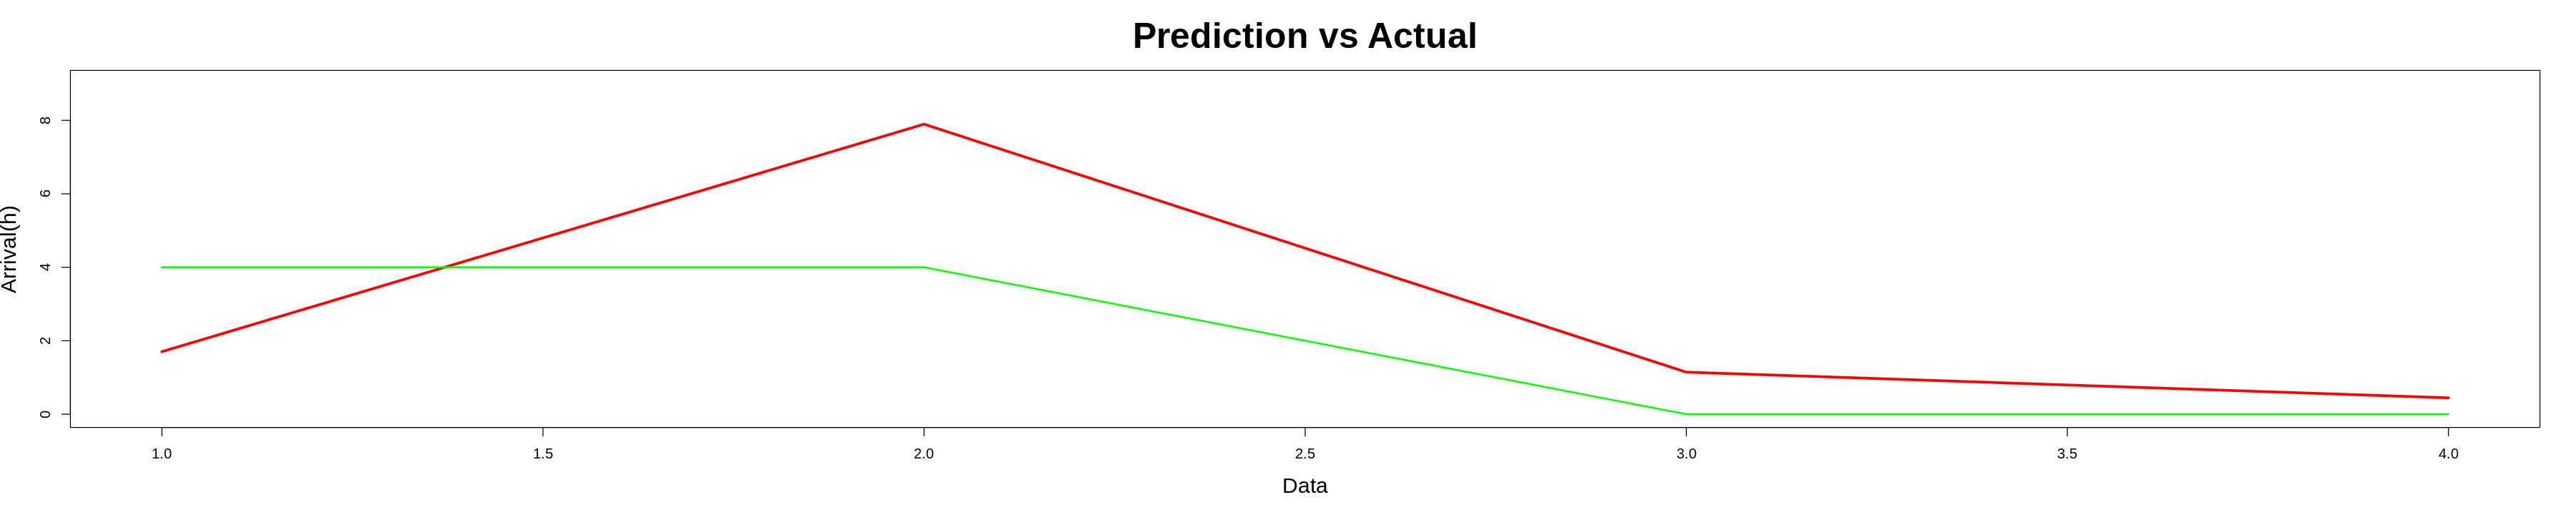

In [ ]:
options(repr.plot.width = 30, repr.plot.height = 6)
plot(df.sample3$pred.arr.h,type="l",col="red",ylab="Arrival(h)", xlab="Data",ylim=c(0,9),lwd=3,main = "Prediction vs Actual",cex.lab=1.5,cex.main=2.5)
lines(df.sample3$arr.h.,col="green",lwd=2)